In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.shape

(200, 4)

In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
corr=df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

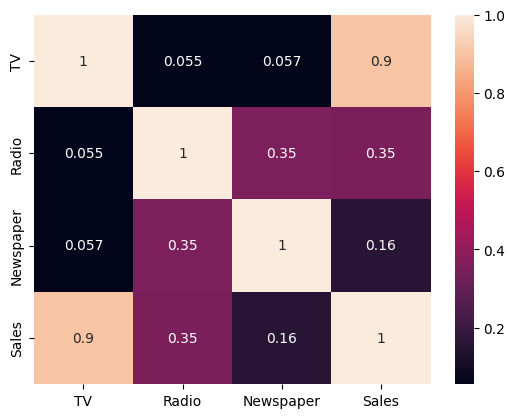

In [ ]:
sns.heatmap(corr, annot=True)

<Axes: xlabel='TV', ylabel='Sales'>

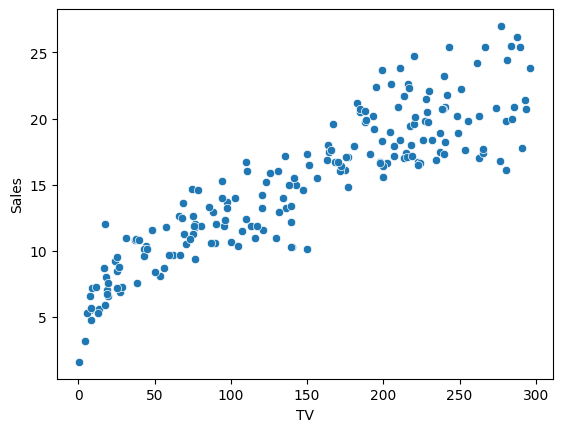

In [ ]:
sns.scatterplot(x='TV', y='Sales', data=df)

<Axes: xlabel='Radio', ylabel='Sales'>

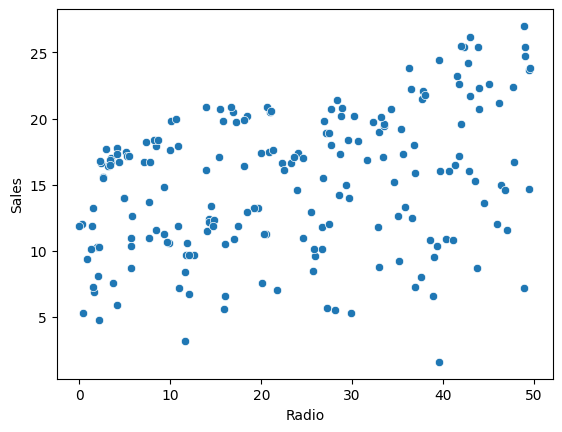

In [ ]:
sns.scatterplot(x='Radio', y='Sales', data=df)

<Axes: xlabel='Newspaper', ylabel='Sales'>

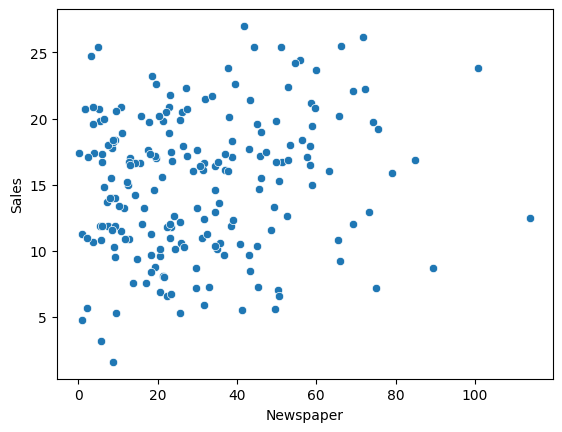

In [ ]:
sns.scatterplot(x='Newspaper', y='Sales', data=df)

<ipython-input-20-5d09401a04cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TV'], hist=True);


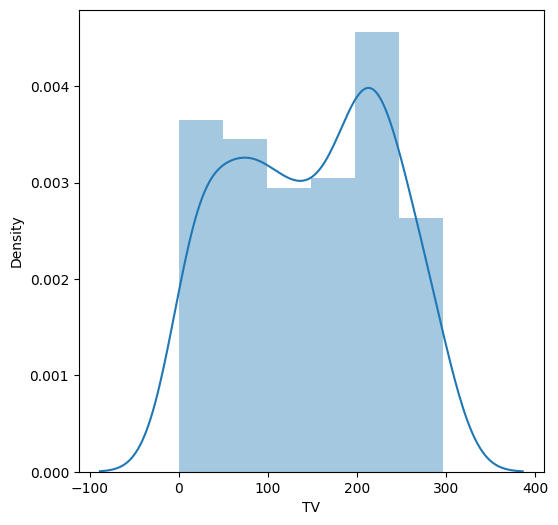

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['TV'], hist=True);

<ipython-input-21-481733d30d81>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Radio'], hist=True);


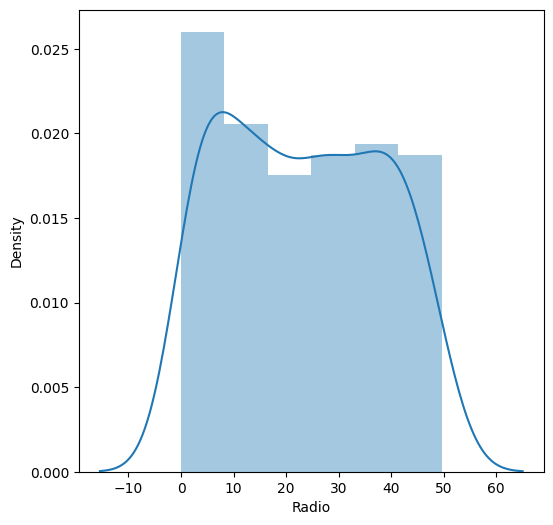

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['Radio'], hist=True);

<ipython-input-22-ce32852d6745>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Newspaper'], hist=True);


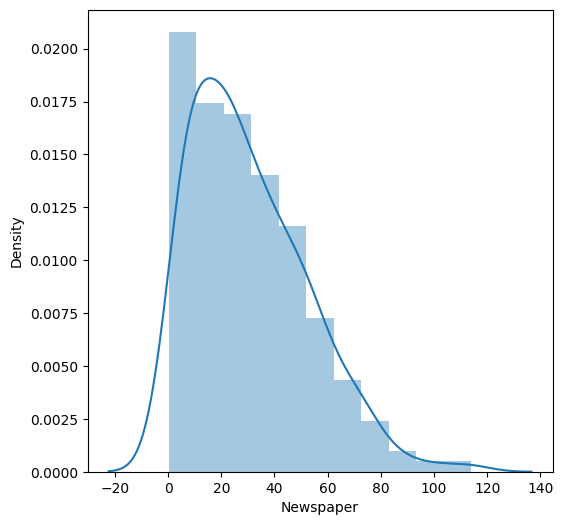

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['Newspaper'], hist=True);

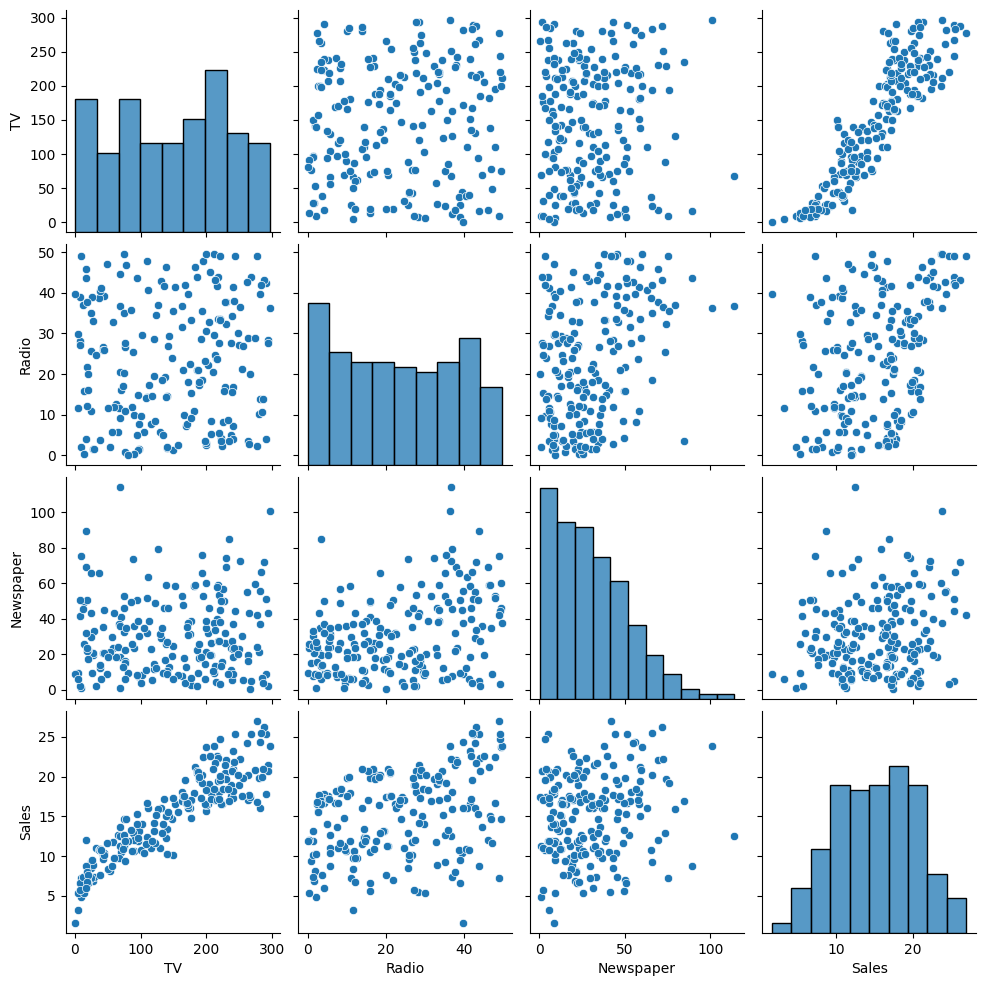

In [ ]:
sns.pairplot(df)

In [ ]:
X=df.drop(columns="Sales",axis=1)
y=df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lm.predict(X_test)
y_pred

array([10.70988945,  8.68629773,  9.5778695 , 24.86207988, 14.65584473,
        8.3214275 , 10.43048002, 18.4453765 ,  9.73394291, 17.9290798 ,
       23.369886  , 10.67916356, 13.44032325, 17.17416235, 11.77380187,
       13.37072678, 21.26009906,  9.19666875, 14.13201846, 18.9260716 ,
       24.75507991, 12.48481182, 16.57130583, 13.77344772,  7.79299106,
       15.19648316, 14.71607944, 20.73862119, 17.01041859,  8.83474391,
       12.09424377, 20.74886454, 21.26147987, 21.90420095,  7.08087067,
        7.04431681,  9.15949871, 15.47796148, 13.28282334,  7.23769883])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8645053923967724

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [ ]:
mean_absolute_error(y_test,y_pred)

1.417031303060067

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.20709495191464403

In [ ]:
mean_squared_error(y_test,y_pred)

4.522552562041291